# 在此範例中我們求出矩陣的特徵值與特徵向量




### 特徵分解Eigendecomposition

用Python 和d NumPy 很容易找到特徵值和特徵向量. 方陣特徵向量 $\textbf{A}$ 為一非零向量 $\textbf{v}$ 當它乘以 $\textbf{A}$ 僅改變 $\textbf{v}$ 大小
$$\textbf{Av} = \lambda\textbf{v} $$ 純量 $\lambda$ 就叫做此特徵向量的特徵值 .

In [2]:
import numpy as np

# 找到特徵值和特徵向量
A = np.diag(np.arange(1,4))
A

array([[1, 0, 0],
       [0, 2, 0],
       [0, 0, 3]])

In [3]:
eigenvalues, eigenvectors = np.linalg.eig(A)

In [4]:
# 回傳矩陣特徵值
eigenvalues

array([1., 2., 3.])

In [5]:
# 回傳矩陣特徵向量
eigenvectors

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [ ]:
# 找出對於特徵向量 v[:, i] 的特徵值 w[i] 
print ('Eigenvalue: {}'.format(eigenvalues[1]))
print ('Eigenvector: {}'.format(eigenvectors[:,1]))

Eigenvalue: 2.0
Eigenvector: [0. 1. 0.]


可以用特徵分解等式 (eigendecomposition equation)驗算之驗算之.
$\textbf{A}$ 的特徵分解是以 $$\textbf{A} = \textbf{V}diag(\lambda)\textbf{V}^{-1}$$ 表達。
其中 $\lambda$ 等於特徵向量, 而 $\textbf{V}$ 是一個每行都是特徵向量的矩陣.

In [6]:
# 驗證特徵分解 - 應該要還原為原矩陣
matrix = np.matmul(np.diag(eigenvalues), np.linalg.inv(eigenvectors))
output = np.matmul(eigenvectors, matrix).astype(np.int)
print (output)

[[1 0 0]
 [0 2 0]
 [0 0 3]]


c:\Users\ASUS\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  This is separate from the ipykernel package so we can avoid doing imports until


讓我們欣賞一下特徵向量和它與原矩陣相乘, $\textbf{A}$. 使用matplotlib畫出來  

In [7]:
# import necessary matplotlib libraries
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.cm as cm
%matplotlib inline

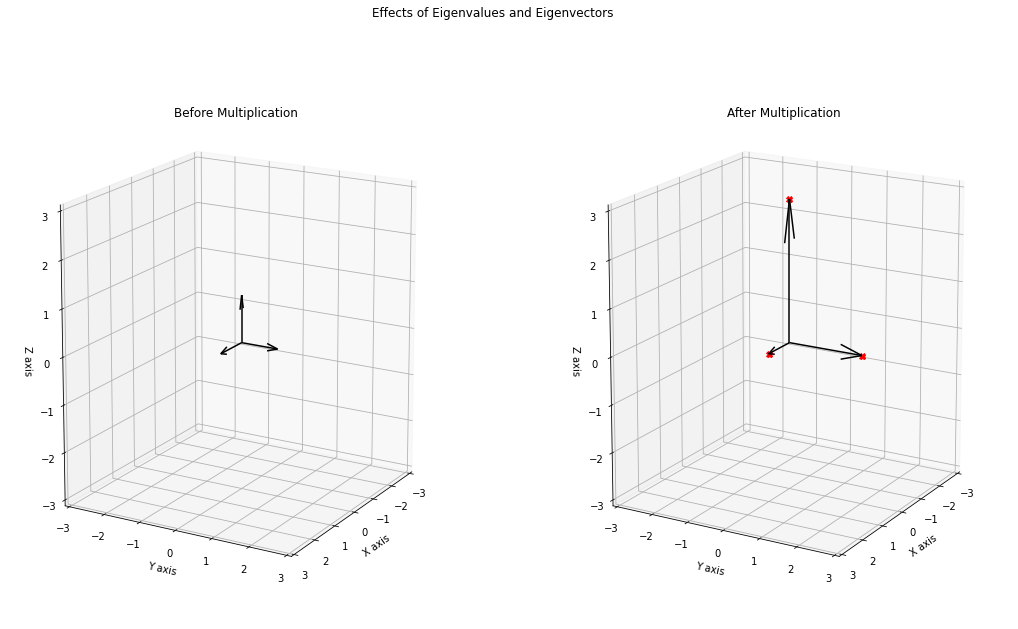

In [ ]:
# 畫出特徵向量
origin = [0,0,0]

fig = plt.figure(figsize=(18,10))
fig.suptitle('Effects of Eigenvalues and Eigenvectors')
ax1 = fig.add_subplot(121, projection='3d')

ax1.quiver(origin, origin, origin, eigenvectors[0, :], eigenvectors[1, :], eigenvectors[2, :], color = 'k')
ax1.set_xlim([-3, 3])
ax1.set_ylim([-3, 3])
ax1.set_zlim([-3, 3])
ax1.set_xlabel('X axis')
ax1.set_ylabel('Y axis')
ax1.set_zlabel('Z axis')
ax1.view_init(15, 30)
ax1.set_title("Before Multiplication")

# 將原矩陣乘以特徵向量
new_eig = np.matmul(A, eigenvectors)
ax2 = plt.subplot(122, projection='3d')

# 畫出新向量
ax2.quiver(origin, origin, origin, new_eig[0, :], new_eig[1, :], new_eig[2, :], color = 'k')

# 畫出每個特徵向量的特徵值 (長短即特徵值)
ax2.plot((eigenvalues[0]*eigenvectors[0]), (eigenvalues[1]*eigenvectors[1]), (eigenvalues[2]*eigenvectors[2]), 'rX')
ax2.set_title("After Multiplication")
ax2.set_xlim([-3, 3])
ax2.set_ylim([-3, 3])
ax2.set_zlim([-3, 3])
ax2.set_xlabel('X axis')
ax2.set_ylabel('Y axis')
ax2.set_zlabel('Z axis')
ax2.view_init(15, 30)

# 圖在此!
plt.show()